<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/6/6f/Dauphine_logo_2019_-_Bleu.png" style="width: 600px;"/> 
</center>

# Partie 1 : Indicateur de probabilit√© de r√©cession USA

# I - Donn√©es et librairies
### I.1 - Importation des librairies et de la base de donn√©es

Nous commen√ßons par installer et importer toutes les librairies dont nous aurons besoin pour ce projet

In [ ]:
# √Ä ne lancer uniquement si vous ne disposez pas de toutes les librairies
#! pip install seaborn
#! pip install matplotlib
#! pip install statsmodels

In [1]:
# Importation des librairies
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import warnings

Importation de la base de donn√©es constitu√©e de la variable √† expliquer, soit l'indicateur des r√©cession et de cinq variables explicatives choisies : **NFP Index, ISM Manufacturing Index, CLI Index USA, Uncertainty Index USA, Spread 10Y-3M**. Les donn√©es sont **trimestrielles**.

In [3]:
excelDataUS = pd.read_excel("../data/Data_Recession_USA.xlsx", index_col=0)

Affichage du tableau de donn√©es

In [5]:
excelDataUS.head()

Recession Indicator  NFP Index  ISM Manufacturing Index  \
Dates                                                                 
2000-03-31                    0     131604                     54.9   
2000-06-30                    0     132060                     51.4   
2000-09-29                    0     132357                     49.7   
2000-12-29                    1     132718                     43.9   
2001-03-30                    1     132751                     43.1   

            CLI Index  Uncertainty Index USA  Spread 10Y-3M  
Dates                                                        
2000-03-31  101.20840              73.298624           0.17  
2000-06-30  100.77630             109.584229          -0.09  
2000-09-29  100.12470              73.550992          -0.55  
2000-12-29   99.10502             149.448500          -0.13  
2001-03-30   98.34007             137.374157           1.17

In [6]:
recessionDataUS = excelDataUS["Recession Indicator"]
nfpDataUS = excelDataUS["NFP Index"]
ismDataUS = excelDataUS["ISM Manufacturing Index"]
cliDataUS = excelDataUS["CLI Index"]
uncertaintyDataUS = excelDataUS["Uncertainty Index USA"]
spreadDataUS = excelDataUS["Spread 10Y-3M"]
dataListUS = [recessionDataUS, nfpDataUS, ismDataUS, cliDataUS, uncertaintyDataUS, spreadDataUS]

### I.2 - Visualisation des donn√©es

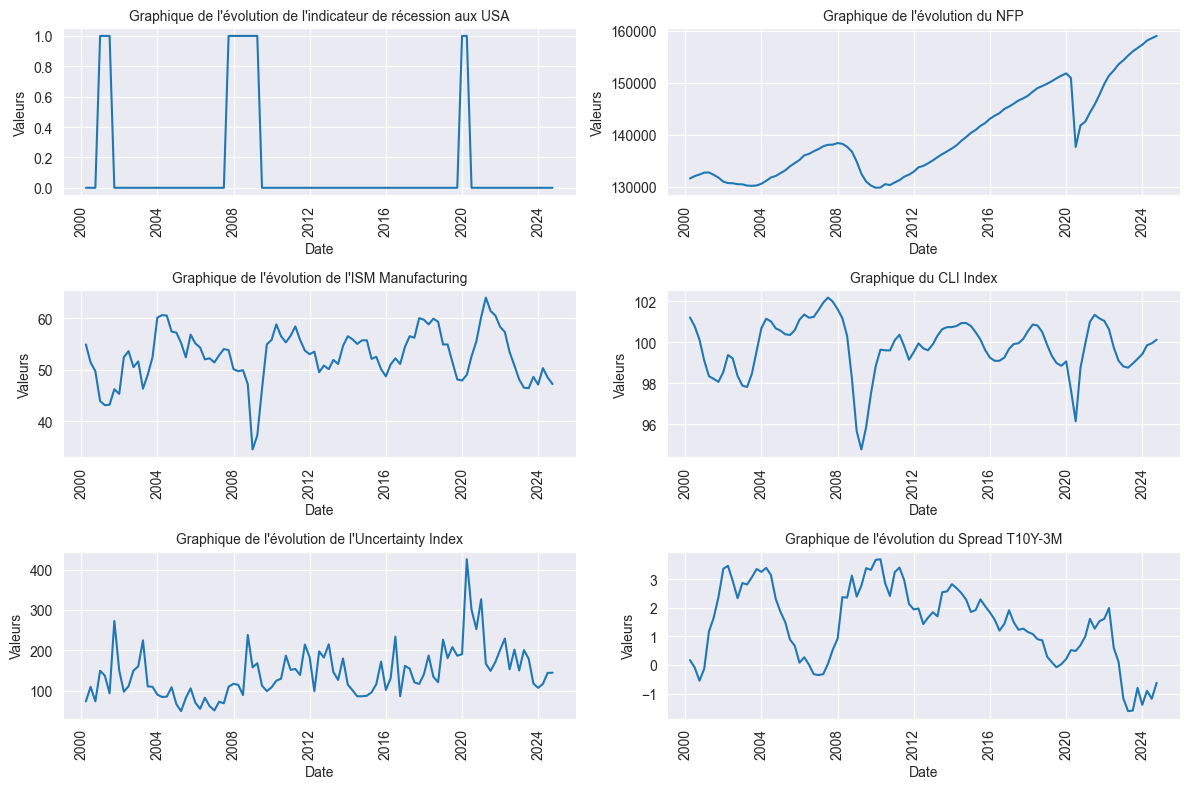

In [8]:
# Ajout d'un fond aux graphiques
sb.set_style("darkgrid")

# Creation d'une grille 3x2
fig, axes = plt.subplots(3, 2, figsize=(12, 8))

# Liste des titres des graphiques
titles = ["Graphique de l'√©volution de l'indicateur de r√©cession aux USA", "Graphique de l'√©volution du NFP", 
          "Graphique de l'√©volution de l'ISM Manufacturing", "Graphique du CLI Index", 
          "Graphique de l'√©volution de l'Uncertainty Index", "Graphique de l'√©volution du Spread T10Y-3M"]

# Boucle pour afficher les graphiques
for i, (ax, data, title) in enumerate(zip(axes.flatten(), dataListUS, titles)):
    # Enregistrement des donn√©es
    x = data.index
    y = data.values
    # Construction du graphique
    ax.plot(x, y)
    # Ajout de titres
    ax.set_xlabel("Date")
    ax.set_ylabel("Valeurs")
    ax.set_title(title, fontsize=10)
    ax.tick_params(axis='x', rotation=90)
# Affichage des graphiques
plt.tight_layout()
plt.show()

Les donn√©es sont toutes trimestrielles, couvrant chaque indicateur du **premier trimestre 1997 au troisi√®me trimestre 2024**. Certaines semblent osciller autour de tendances, comme c‚Äôest le cas pour les Non-Farm Payrolls et l'Uncertainty Index. Plusieurs s√©ries partagent une caract√©ristique commune : des **variations extr√™mes**, avec de forts pics en **2000, 2008 et 2020**, correspondant respectivement **√† la bulle internet, √† la crise des subprimes et √† la pand√©mie de Covid-19**. Une premi√®re visualisation nous donne un aper√ßu de la stationnarit√© de chaque s√©rie, qui sera ensuite analys√©e par des tests plus approfondis.

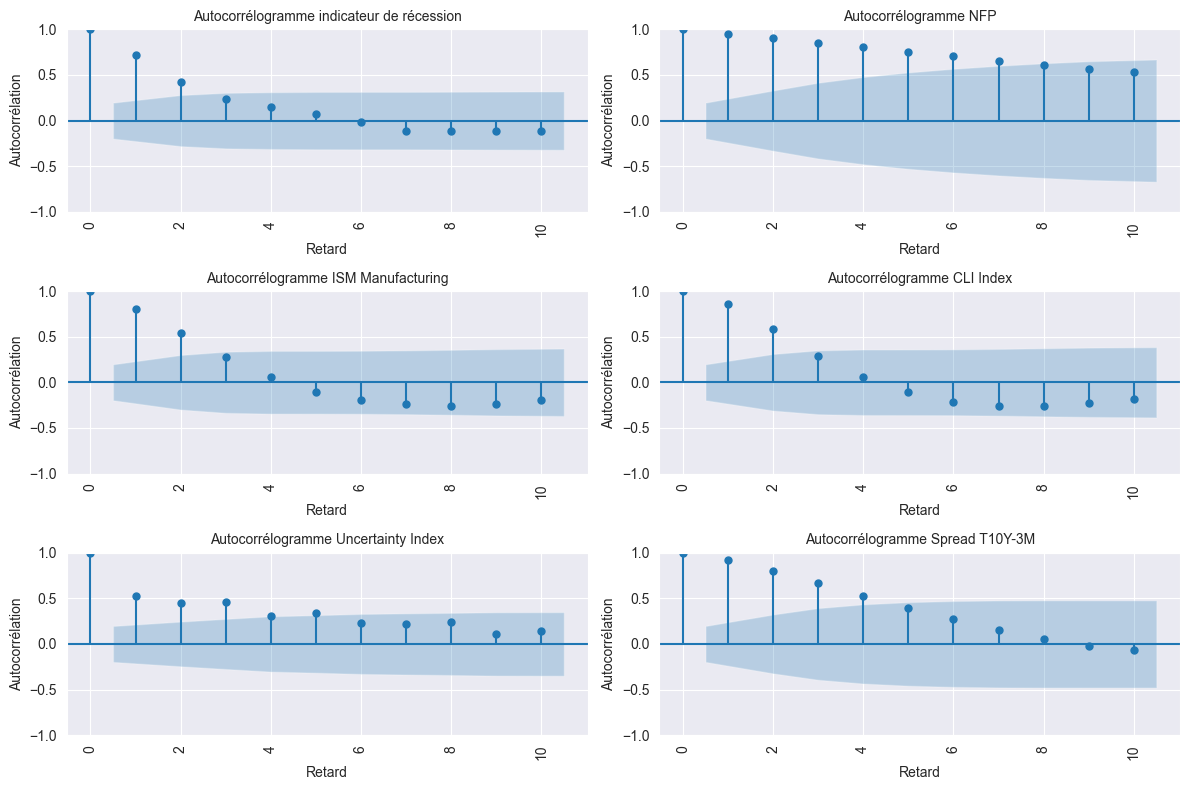

In [10]:
# Creation d'une grille 3x2
fig, axes = plt.subplots(3, 2, figsize=(12, 8))

# Liste des titres des graphiques
titles = ["Autocorr√©logramme indicateur de r√©cession", "Autocorr√©logramme NFP", 
          "Autocorr√©logramme ISM Manufacturing", "Autocorr√©logramme CLI Index", 
          "Autocorr√©logramme Uncertainty Index", "Autocorr√©logramme Spread T10Y-3M"]

# Boucle pour afficher les graphiques
for i, (ax, data, title) in enumerate(zip(axes.flatten(), dataListUS, titles)):
    # Construction de l'autocorr√©logramme
    plot_acf(data, lags=10, ax=ax)
    # Ajout de titres
    ax.set_xlabel("Retard")
    ax.set_ylabel("Autocorr√©lation")
    ax.set_title(title, fontsize=10)
    ax.tick_params(axis='x', rotation=90)
# Affichage des graphiques
plt.tight_layout()
plt.show()

La plupart des autocorr√©lations $\hat{œÅ}$ (ACF) d√©croissent √† un rythme **rapide**.

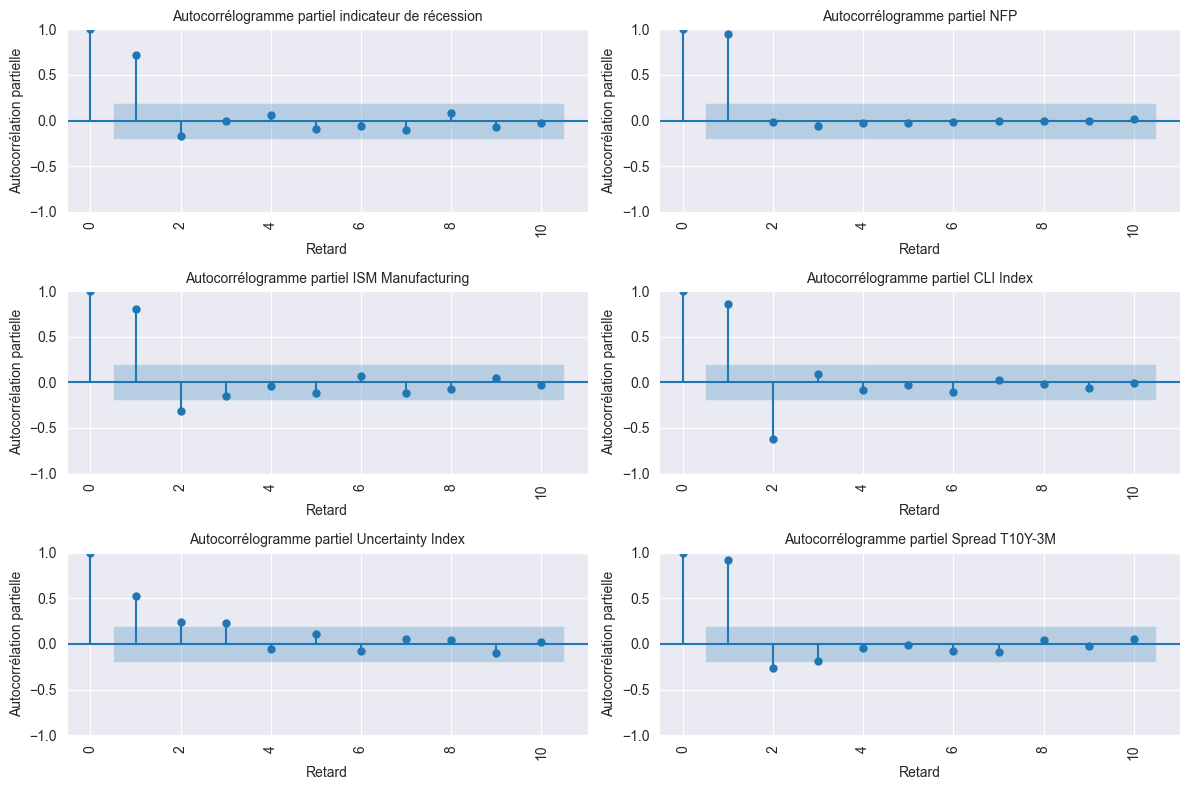

In [12]:
# Creation d'une grille 3x2
fig, axes = plt.subplots(3, 2, figsize=(12, 8))

# Liste des titres des graphiques
titles = ["Autocorr√©logramme partiel indicateur de r√©cession", "Autocorr√©logramme partiel NFP", 
          "Autocorr√©logramme partiel ISM Manufacturing", "Autocorr√©logramme partiel CLI Index", 
          "Autocorr√©logramme partiel Uncertainty Index", "Autocorr√©logramme partiel Spread T10Y-3M"]

# Boucle pour afficher les graphiques
for i, (ax, data, title) in enumerate(zip(axes.flatten(), dataListUS, titles)):
    # Construction de l'autocorr√©logramme partiel
    plot_pacf(data, lags=10, method="ywm", ax=ax)
    # Ajout de titres
    ax.set_xlabel("Retard")
    ax.set_ylabel("Autocorr√©lation partielle")
    ax.set_title(title, fontsize=10)
    ax.tick_params(axis='x', rotation=90)
# Affichage des graphiques
plt.tight_layout()
plt.show()

Les autocorr√©lations partielles $\hat{r}$ (PACF) sont **significatives pour les deux premiers ordres**. La premi√®re
autocorr√©lation $\hat{r}_1$ partielle est tr√®s proche de 1. **Au-del√† du 2√®me rang, elles sont tr√®s proches 0**.

# II - Stationnarit√© des variables explicatives
### II.1 - Test de racine unitaire : Strat√©gie de tests s√©quentielle avec ADF

La **stationnarit√©** des variables est **essentielle** avant d'estimer les pr√©visions de notre mod√®le Probit (les pr√©visions des variables explicatives se font via ARIMA), car elle assure que les relations entre les variables demeurent constantes dans le temps, **√©vitant ainsi des biais dans les estimations**. En outre, une non-stationnarit√© pourrait introduire des tendances artificielles, **faussant ainsi les probabilit√©s pr√©vues par le mod√®le**.

**La variable √† expliquer est, par construction, stationnaire**. Il s'agit d'une variable indicatrice qui prend deux valeurs : 1 en cas de r√©cession, 0 sinon. Pour le reste des variables, nous r√©alisons le **test de Dickey-Fuller augment√©** sur chacune des variables. Le **nombre de retards optimal** sera s√©lectionn√© selon le **crit√®re d‚ÄôAkaike** et tous les autres param√®tres sont laiss√©s par d√©faut. Pour chaque variable, nous effectuons le test ADF selon 3 sp√©cifications :
* Processus avec tendance d√©terministe et constante
* Processus avec constante (sans tendance d√©terministe)
* Processus sans tendance d√©terministe et sans constante

In [18]:
# Fonction pour afficher les r√©sultats du test ADF
def display_adf_results(data, label, regression_type):
    result = adfuller(data, maxlag=None, regression=regression_type, autolag='AIC', store=False, regresults=False)
    print(f"Results for {label} :")
    print("-" * 40)
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("\n")

Pour chaque s√©rie, nous disposons de **99 observations**, les seuils critiques sont √† chercher dans la **table de Dickey-Fuller** pour le mod√®le sp√©cifi√© :
* Processus avec tendance d√©terministe et constante
| ùõº      | 1%   | 5%   | 10%  |
|--------|------|------|------|
| N = 100| -4.04 | -3.45 | -3.15 |
* Processus avec constante (sans tendance d√©terministe)
| ùõº      | 1%   | 5%   | 10%  |
|--------|------|------|------|
| N = 100| -3.51 | -2.89 | -2.58 |
* Processus sans tendance d√©terministe et sans constante
| ùõº      | 1%   | 5%   | 10%  |
|--------|------|------|------|
| N = 100| -2.60 | -1.95 | -1.61 |

In [23]:
display_adf_results(nfpDataUS, "NFP - Processus avec tendance d√©terministe et constante", 'ct')
display_adf_results(nfpDataUS, "NFP - Processus avec constante (sans tendance d√©terministe)", 'c')
display_adf_results(nfpDataUS, "NFP - Processus sans tendance d√©terministe et sans constante", 'n')

Results for NFP - Processus avec tendance d√©terministe et constante :
----------------------------------------
ADF Statistic: -1.7339
p-value: 0.7357


Results for NFP - Processus avec constante (sans tendance d√©terministe) :
----------------------------------------
ADF Statistic: 0.2589
p-value: 0.9754


Results for NFP - Processus sans tendance d√©terministe et sans constante :
----------------------------------------
ADF Statistic: 1.7652
p-value: 0.9819




La statistique de test $t_{ADF}$ est sup√©rieure aux seuils critiques pour ùõº = 1%, 5% et 10% donc nous ne rejetons pas
l‚Äôhypoth√®se nulle de racine unitaire $ùêª_0: ùúå = 0$. **La s√©rie NFP est non-stationnaire**.

In [25]:
display_adf_results(ismDataUS, "ISM Manufacturing - Processus avec tendance d√©terministe et constante ", 'ct')

Results for ISM Manufacturing - Processus avec tendance d√©terministe et constante  :
----------------------------------------
ADF Statistic: -3.6177
p-value: 0.0284




La statistique de test $t_{ADF}$ est inf√©rieure aux seuils critiques pour ùõº = 1%, 5% et 10% pour le premier processus donc nous rejetons l‚Äôhypoth√®se nulle de racine unitaire $ùêª_0: ùúå = 0$. **La s√©rie ISM est stationnaire** autour d'une tendance d√©terministe avec une constante. Il n'est pas n√©cessaire d'√©tudier les deux autres processus.

In [28]:
display_adf_results(cliDataUS, "CLI - Processus avec tendance d√©terministe et constante ", 'ct')

Results for CLI - Processus avec tendance d√©terministe et constante  :
----------------------------------------
ADF Statistic: -5.4559
p-value: 0.0000




La statistique de test $t_{ADF}$ est inf√©rieure aux seuils critiques pour ùõº = 1%, 5% et 10% pour le premier processus donc nous rejetons l‚Äôhypoth√®se nulle de racine unitaire $ùêª_0: ùúå = 0$. **La s√©rie CLI est stationnaire** autour d'une tendance d√©terministe avec une constante. Il n'est pas n√©cessaire d'√©tudier les deux autres processus.

In [30]:
display_adf_results(uncertaintyDataUS, "Uncertainty - Processus avec tendance d√©terministe et constante ", 'ct')
display_adf_results(uncertaintyDataUS, "Uncertainty - Processus avec constante (sans tendance d√©terministe)", 'c')
display_adf_results(uncertaintyDataUS, "Uncertainty - Processus sans tendance d√©terministe et sans constante ", 'n')

Results for Uncertainty - Processus avec tendance d√©terministe et constante  :
----------------------------------------
ADF Statistic: -3.0484
p-value: 0.1190


Results for Uncertainty - Processus avec constante (sans tendance d√©terministe) :
----------------------------------------
ADF Statistic: -2.8128
p-value: 0.0565


Results for Uncertainty - Processus sans tendance d√©terministe et sans constante  :
----------------------------------------
ADF Statistic: -0.7198
p-value: 0.4043




La statistique de test $t_{ADF}$ est sup√©rieure aux seuils critiques pour ùõº = 1% et 5% pour le premier processus, elle est tr√®s proche du seuil √† 5% pour le deuxi√®me processus, et au dessus de tous les seuils pour le troisi√®me processus donc nous ne rejetons pas l‚Äôhypoth√®se nulle de racine unitaire $ùêª_0: ùúå = 0$. Dans le doute, nous consid√©rerons que **la s√©rie Uncertainty est non-stationnaire**.

In [33]:
display_adf_results(spreadDataUS, "Spread 10Y-3M - Processus avec tendance d√©terministe et constante ", 'ct')
display_adf_results(spreadDataUS, "Spread 10Y-3M - Processus avec constante (sans tendance d√©terministe)", 'c')
display_adf_results(spreadDataUS, "Spread 10Y-3M - Processus sans tendance d√©terministe et sans constante ", 'n')

Results for Spread 10Y-3M - Processus avec tendance d√©terministe et constante  :
----------------------------------------
ADF Statistic: -3.8530
p-value: 0.0141


Results for Spread 10Y-3M - Processus avec constante (sans tendance d√©terministe) :
----------------------------------------
ADF Statistic: -2.8741
p-value: 0.0484


Results for Spread 10Y-3M - Processus sans tendance d√©terministe et sans constante  :
----------------------------------------
ADF Statistic: -1.7557
p-value: 0.0751




La statistique de test $t_{ADF}$ est sup√©rieure aux seuils critiques pour ùõº = 1%, 5% et 10% pour le premier processus, elle est tr√®s proche du seuil √† 5% pour le deuxi√®me processus et le troisi√®me processus donc nous ne rejetons pas l‚Äôhypoth√®se nulle de racine unitaire $ùêª_0: ùúå = 0$. Dans le doute, nous consid√©rerons que **la s√©rie Uncertainty est non-stationnaire**.

### II.2 - Stationnarisation des s√©ries

Pour les s√©ries non stationnaires, nous calculons leur **diff√©rence premi√®re** autant de fois que n√©cessaire pour les rendre **I(0)**. Cette op√©ration r√©duit la taille de notre √©chantillon, donc nous tronquons √©galement les s√©ries d√©j√† stationnaires afin qu‚Äôelles aient toutes les m√™mes dimensions.

In [39]:
nfpDataUSStationary = nfpDataUS.diff().dropna()
ismDataUSStationary = ismDataUS[1:]
cliDataUSStationary = cliDataUS.diff().dropna()
uncertaintyDataUSStationary = uncertaintyDataUS.diff().dropna()
spreadDataUSStationary = spreadDataUS.diff().dropna()

# III - Mod√®le Probit : Indicateur de probabilit√© de r√©cession
### III.1 - Construction du mod√®le

In [47]:
# Construction d'un nouveau DataFrame avec nos donn√©es stationnaires
X = pd.DataFrame({
    'NFP': nfpDataUSStationary,
    'ISM': ismDataUSStationary,
    'CLI' : cliDataUSStationary,
    'Uncertainty' : uncertaintyDataUSStationary,
    'Spread' : spreadDataUSStationary})

# Ajout d'une constante √† X puisque la fonction Probit n'en a pas par d√©faut
X = sm.add_constant(X)

# Variable d√©pendante
y = recessionDataUS[1:]

# Ajustement du mod√®le Probit
model = sm.Probit(y, X)
result = model.fit()
predictions = result.predict(X)
# Affichage des r√©sultats du mod√®le
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.122640
         Iterations 9
                           Probit Regression Results                           
Dep. Variable:     Recession Indicator   No. Observations:                   98
Model:                          Probit   Df Residuals:                       92
Method:                            MLE   Df Model:                            5
Date:                 Thu, 02 Jan 2025   Pseudo R-squ.:                  0.6701
Time:                         18:55:06   Log-Likelihood:                -12.019
converged:                        True   LL-Null:                       -36.434
Covariance Type:             nonrobust   LLR p-value:                 2.403e-09
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.5994      4.625      1.427      0.154      -2.465      15.664
NFP             0.

### III.2 - Affichage des r√©sultats

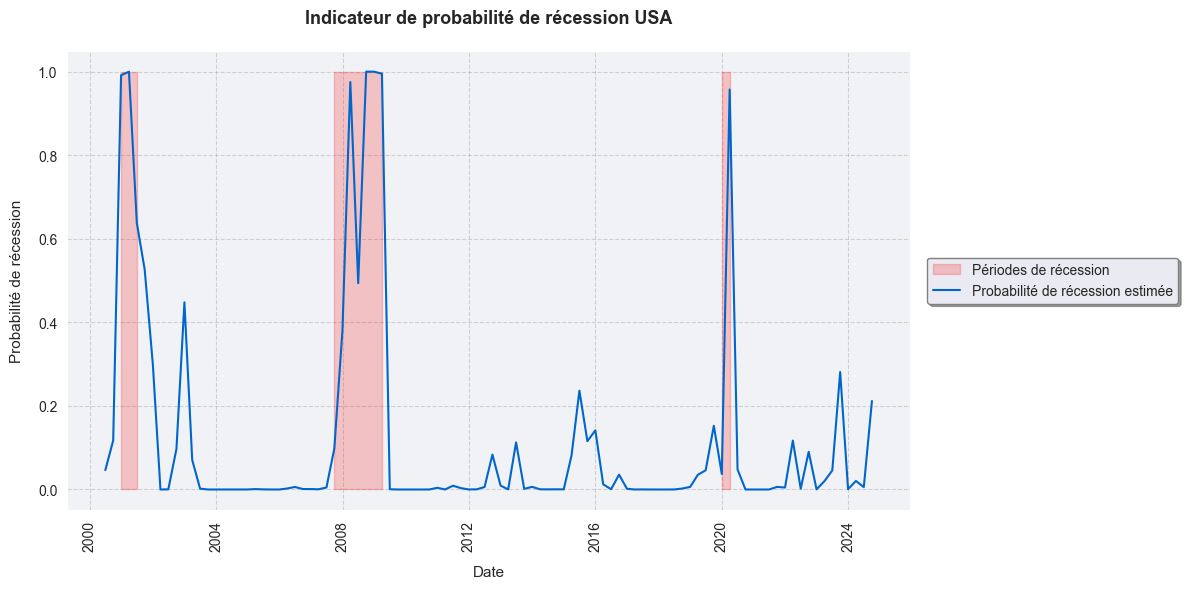

In [50]:
# Configuration du style
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

# Cr√©ation de la figure avec des marges ajust√©es
fig, ax = plt.subplots(figsize=(12, 6))

# Affichage des p√©riodes de r√©cession
ax.fill_between(recessionDataUS[1:].index, 0, 1, where=(recessionDataUS[1:] == 1), 
                color='red', alpha=0.2, label='P√©riodes de r√©cession')

# Ajout des probabilit√©s de r√©cession estim√©es
ax.plot(recessionDataUS[1:].index, predictions, 
        label='Probabilit√© de r√©cession estim√©e', color='#0066CC', linewidth=1.5)

# Ajout de titres
ax.set_title('Indicateur de probabilit√© de r√©cession USA', pad=20, fontsize=13, fontweight='bold')
ax.set_xlabel('Date', fontsize=11, labelpad=10)
ax.set_ylabel('Probabilit√© de r√©cession', fontsize=11, labelpad=10)
ax.tick_params(axis='x', rotation=90)

# Ajout d'un fond
ax.set_facecolor('#F0F2F6')
ax.grid(True, linestyle='--', alpha=0.3, color='gray')

# Ajout d'une l√©gende
ax.legend(bbox_to_anchor=(1.02, 0.5), loc="center left", borderaxespad=0, fontsize=10,
         frameon=True, fancybox=True, edgecolor='gray', shadow=True)

# Affichage du graphique
plt.tight_layout()
plt.show()

### III.3 - Pr√©dictions du mod√®le pour 2025

In [53]:
warnings.filterwarnings('ignore', 'No frequency information was provided')

# Fonction r√©alisant des pr√©visions ARIMA pour chaque variable explicative
def forecast_variables(X, periods=4):
    forecasts = {}
    
    # Pour chaque variable (sauf la constante)
    for column in X.columns[1:]: 
        # Ajustement du mod√®le ARIMA
        model = ARIMA(X[column], order=(1,0,1))
        results = model.fit()
        # R√©alisation des pr√©visions
        forecast = results.forecast(steps=periods)
        forecasts[column] = forecast
    
    # Cr√©ation d'un DataFrame avec les pr√©visions
    forecast_df = pd.DataFrame(forecasts)
    # Ajout de la constante
    forecast_df.insert(0, 'const', 1.0)
    
    return forecast_df

# Fonction utilisant les pr√©visions des variables explicatives pour pr√©dire la probabilit√© de r√©cession
def make_recession_predictions(probit_model, forecast_df):
    return probit_model.predict(forecast_df)

# R√©alisation des pr√©visions pour les variables explicatives
forecast_X = forecast_variables(X, periods=4)

# Utilisation des pr√©visions dans le mod√®le Probit
recession_probabilities = make_recession_predictions(result, forecast_X)

# Cr√©ation d'un DataFrame pour afficher les r√©sultats
forecast_dates = pd.date_range(start=X.index[-1], periods=5, freq='Q')[1:]  # Ajustez selon vos dates
forecast_results = pd.DataFrame({'Recession_Probability': recession_probabilities})

# Affichage des r√©sultats
print("\nPr√©visions de probabilit√© de r√©cession pour les 4 prochains trimestres :")
print(forecast_results)


Pr√©visions de probabilit√© de r√©cession pour les 4 prochains trimestres :
            Recession_Probability
2024-12-31               0.029633
2025-03-31               0.031420
2025-06-30               0.023723
2025-09-30               0.017899


C:\Users\nnayr\AppData\Local\Temp\ipykernel_12408\3157971980.py:34: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_dates = pd.date_range(start=X.index[-1], periods=5, freq='Q')[1:]  # Ajustez selon vos dates


C:\Users\nnayr\AppData\Local\Temp\ipykernel_12408\2324455790.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_value = predictions[-1]
C:\Users\nnayr\AppData\Local\Temp\ipykernel_12408\2324455790.py:6: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_dates_new = pd.date_range(start=last_date, periods=5, freq='Q')


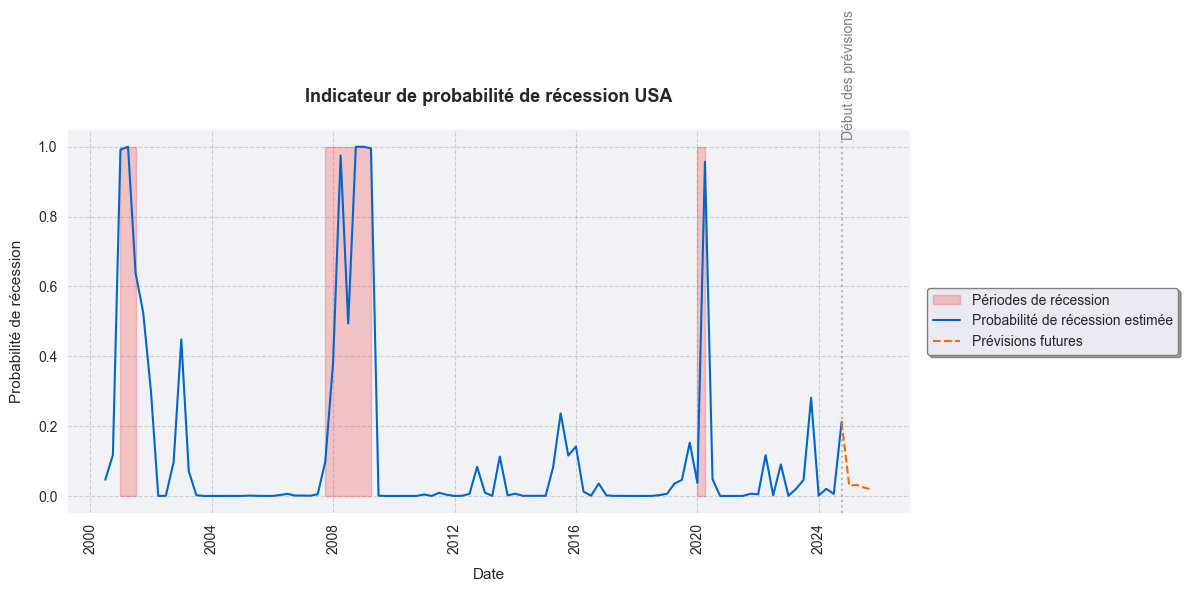

In [54]:
# R√©cup√©ration de la derni√®re date et de la derni√®re valeur des pr√©dictions historiques
last_date = recessionDataUS[1:].index[-1]
last_value = predictions[-1]

# Cr√©ation du DataFrame pour les pr√©visions en commen√ßant par le dernier point historique
forecast_dates_new = pd.date_range(start=last_date, periods=5, freq='Q')
forecast_results_new = np.concatenate(([last_value], recession_probabilities))

# Configuration du style
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

# Cr√©ation de la figure avec des marges ajust√©es
fig, ax = plt.subplots(figsize=(12, 6))

# Affichage des p√©riodes de r√©cession
ax.fill_between(recessionDataUS[1:].index, 0, 1, where=(recessionDataUS[1:] == 1), 
                color='red', alpha=0.2, label='P√©riodes de r√©cession')

# Ajout des probabilit√©s de r√©cession estim√©es
ax.plot(recessionDataUS[1:].index, predictions, 
        label='Probabilit√© de r√©cession estim√©e', color='#0066CC', linewidth=1.5)

# Ajout des pr√©visions futures avec un style diff√©rent
ax.plot(forecast_dates_new, forecast_results_new, 
        label='Pr√©visions futures', color='#FF6600', linewidth=1.5, linestyle='--')

# Ajout d'une ligne verticale pour marquer le d√©but des pr√©visions
ax.axvline(x=last_date, color='gray', linestyle=':', alpha=0.5)
ax.text(last_date, 1.02, 'D√©but des pr√©visions', 
        rotation=90, verticalalignment='bottom', color='gray')

# Ajout de titres
ax.set_title('Indicateur de probabilit√© de r√©cession USA', pad=20, fontsize=13, fontweight='bold')
ax.set_xlabel('Date', fontsize=11, labelpad=10)
ax.set_ylabel('Probabilit√© de r√©cession', fontsize=11, labelpad=10)
ax.tick_params(axis='x', rotation=90)

# Ajout d'un fond
ax.set_facecolor('#F0F2F6')
ax.grid(True, linestyle='--', alpha=0.3, color='gray')

# Ajout d'une l√©gende
ax.legend(bbox_to_anchor=(1.02, 0.5), loc="center left", borderaxespad=0, fontsize=10,
          frameon=True, fancybox=True, edgecolor='gray', shadow=True)

# Affichage du graphique
plt.tight_layout()
plt.show()

# Partie 2 : Indicateur de probabilit√© de r√©cession Zone Euro

# I - Donn√©es
### I.1 - Importation de la base de donn√©es

Importation de la base de donn√©es constitu√©e de la variable √† expliquer, soit l'indicateur des r√©cession et de quatre variables explicatives choisies : **Economic Sentiment Indicator, CLI Index EU, Uncertainty Index EU, Spread 10Y Italy/Allemagne, Composite Indicator of Systemic Stress (CISS)**. Les donn√©es sont **trimestrielles**.

In [60]:
excelDataEU = pd.read_excel("../data/Data_Recession_EU.xlsx", index_col=0)

Affichage du tableau de donn√©es

In [63]:
excelDataEU.head()

Recession Indicator EU  Economic sentiment indicator EU  \
Dates                                                                 
2000-03-31                       0                            118.0   
2000-06-30                       0                            115.5   
2000-09-29                       0                            114.0   
2000-12-29                       0                            113.3   
2001-03-30                       0                            107.5   

            CLI Index EU  Uncertainty Index EU  Spread Italy-Germany  \
Dates                                                                  
2000-03-31      101.7243             75.439555              0.223287   
2000-06-30      101.9203             59.968966              0.281966   
2000-09-29      101.8991             70.463777              0.348680   
2000-12-29      101.5547             99.956842              0.390898   
2001-03-30      100.7619            108.432236              0.416197   

            Systemic Stress Index  
Dates                              
2000-03-31                 0.0787  
2000-06-30                 0.1736  
2000-09-29                 0.1476  
2000-12-29                 0.1774  
2001-03-30                 0.1737

In [65]:
recessionDataEU = excelDataEU["Recession Indicator EU"]
esiDataEU = excelDataEU["Economic sentiment indicator EU"]
cliDataEU = excelDataEU["CLI Index EU"]
uncertaintyDataEU = excelDataEU["Uncertainty Index EU"]
spreadDataEU = excelDataEU["Spread Italy-Germany"]
stressDataEU = excelDataEU["Systemic Stress Index"]
dataListEU = [recessionDataEU, esiDataEU, cliDataEU, uncertaintyDataEU, spreadDataEU, stressDataEU]

### I.2 - Visualisation des donn√©es

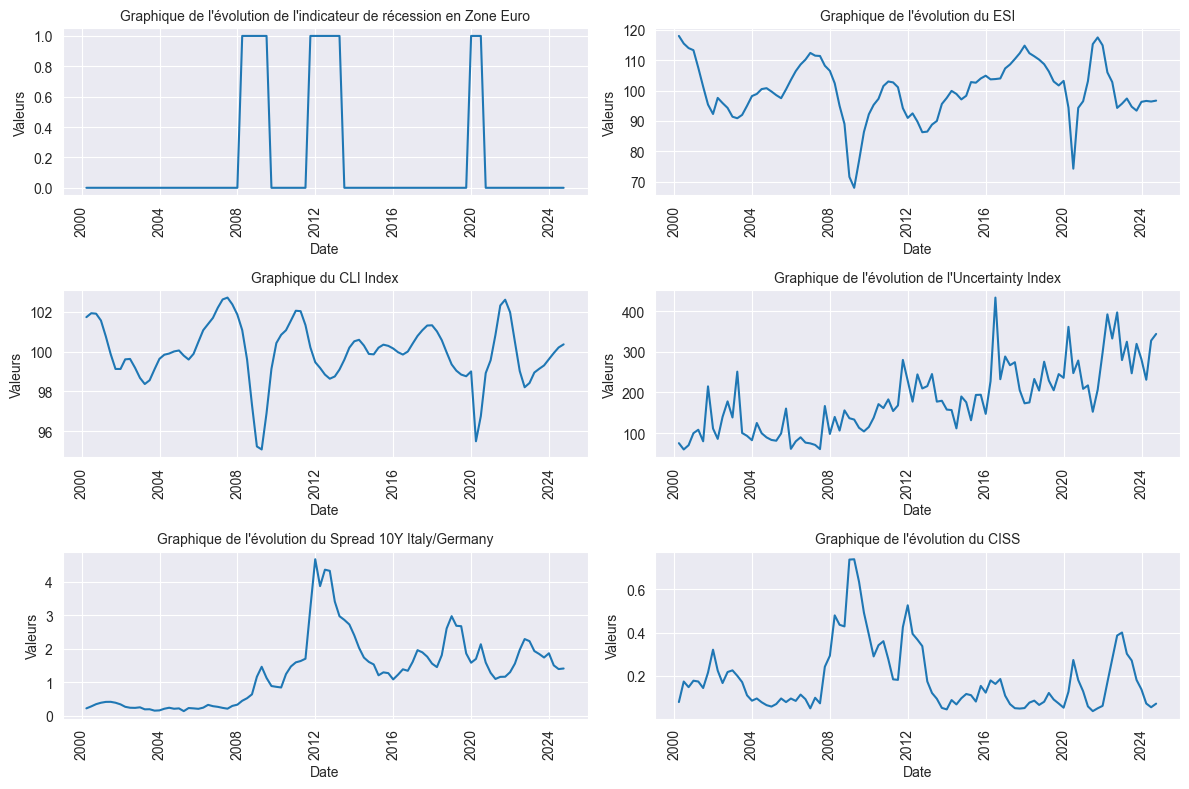

In [68]:
# Ajout d'un fond aux graphiques
sb.set_style("darkgrid")

# Creation d'une grille 3x2
fig, axes = plt.subplots(3, 2, figsize=(12, 8))

# Liste des titres des graphiques
titles = ["Graphique de l'√©volution de l'indicateur de r√©cession en Zone Euro", "Graphique de l'√©volution du ESI", 
          "Graphique du CLI Index", "Graphique de l'√©volution de l'Uncertainty Index", 
          "Graphique de l'√©volution du Spread 10Y Italy/Germany", "Graphique de l'√©volution du CISS"]

# Boucle pour afficher les graphiques
for i, (ax, data, title) in enumerate(zip(axes.flatten(), dataListEU, titles)):
    # Enregistrement des donn√©es
    x = data.index
    y = data.values
    # Construction du graphique
    ax.plot(x, y)
    # Ajout de titres
    ax.set_xlabel("Date")
    ax.set_ylabel("Valeurs")
    ax.set_title(title, fontsize=10)
    ax.tick_params(axis='x', rotation=90)
# Affichage des graphiques
plt.tight_layout()
plt.show()

Les donn√©es sont toutes trimestrielles, couvrant chaque indicateur du **premier trimestre 1997 au troisi√®me trimestre 2024**. Certaines semblent osciller autour de tendances, comme c‚Äôest le cas pour les Non-Farm Payrolls et l'Uncertainty Index. Plusieurs s√©ries partagent une caract√©ristique commune : des **variations extr√™mes**, avec de forts pics en **2000, 2008 et 2020**, correspondant respectivement **√† la bulle internet, √† la crise des subprimes et √† la pand√©mie de Covid-19**. Une premi√®re visualisation nous donne un aper√ßu de la stationnarit√© de chaque s√©rie, qui sera ensuite analys√©e par des tests plus approfondis.

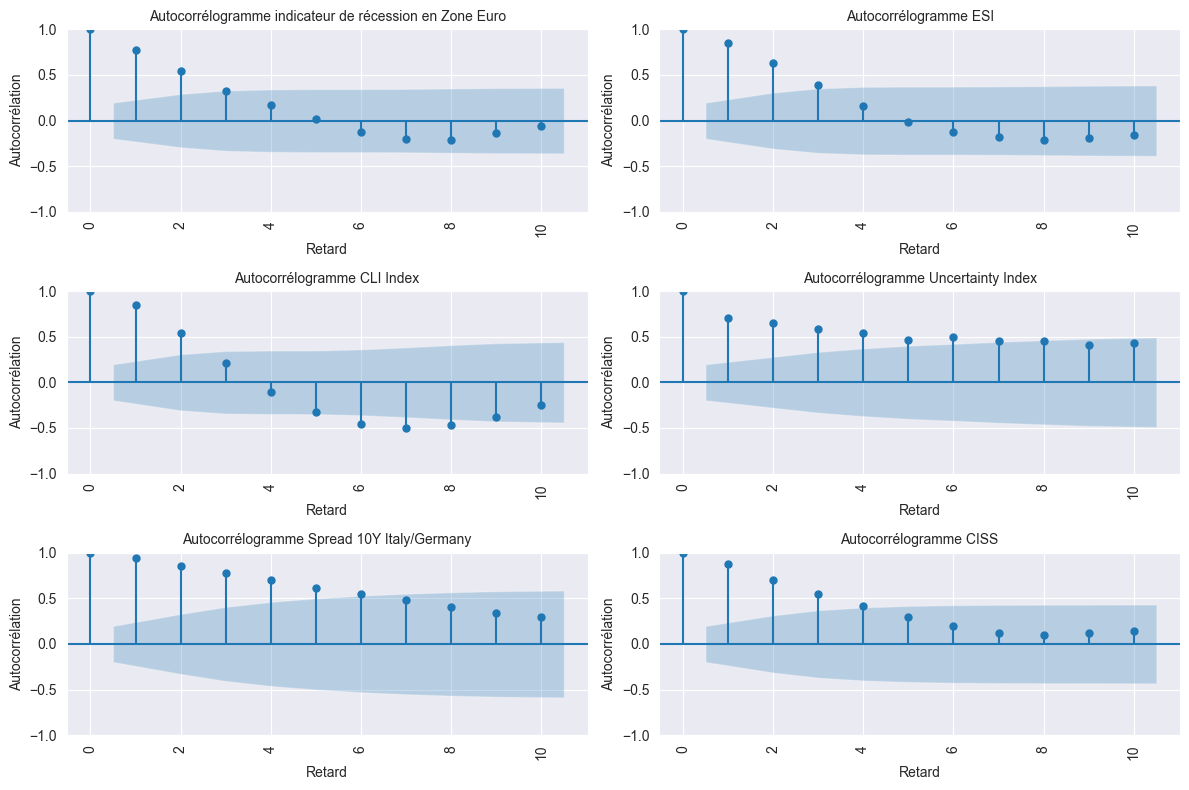

In [70]:
# Creation d'une grille 3x2
fig, axes = plt.subplots(3, 2, figsize=(12, 8))

# Liste des titres des graphiques
titles = ["Autocorr√©logramme indicateur de r√©cession en Zone Euro", "Autocorr√©logramme ESI", 
          "Autocorr√©logramme CLI Index", "Autocorr√©logramme Uncertainty Index", 
          "Autocorr√©logramme Spread 10Y Italy/Germany", "Autocorr√©logramme CISS"]

# Boucle pour afficher les graphiques
for i, (ax, data, title) in enumerate(zip(axes.flatten(), dataListEU, titles)):
    # Construction de l'autocorr√©logramme
    plot_acf(data, lags=10, ax=ax)
    # Ajout de titres
    ax.set_xlabel("Retard")
    ax.set_ylabel("Autocorr√©lation")
    ax.set_title(title, fontsize=10)
    ax.tick_params(axis='x', rotation=90)
# Affichage des graphiques
plt.tight_layout()
plt.show()

La plupart des autocorr√©lations $\hat{œÅ}$ (ACF) d√©croissent √† des rythmes vari√©s.

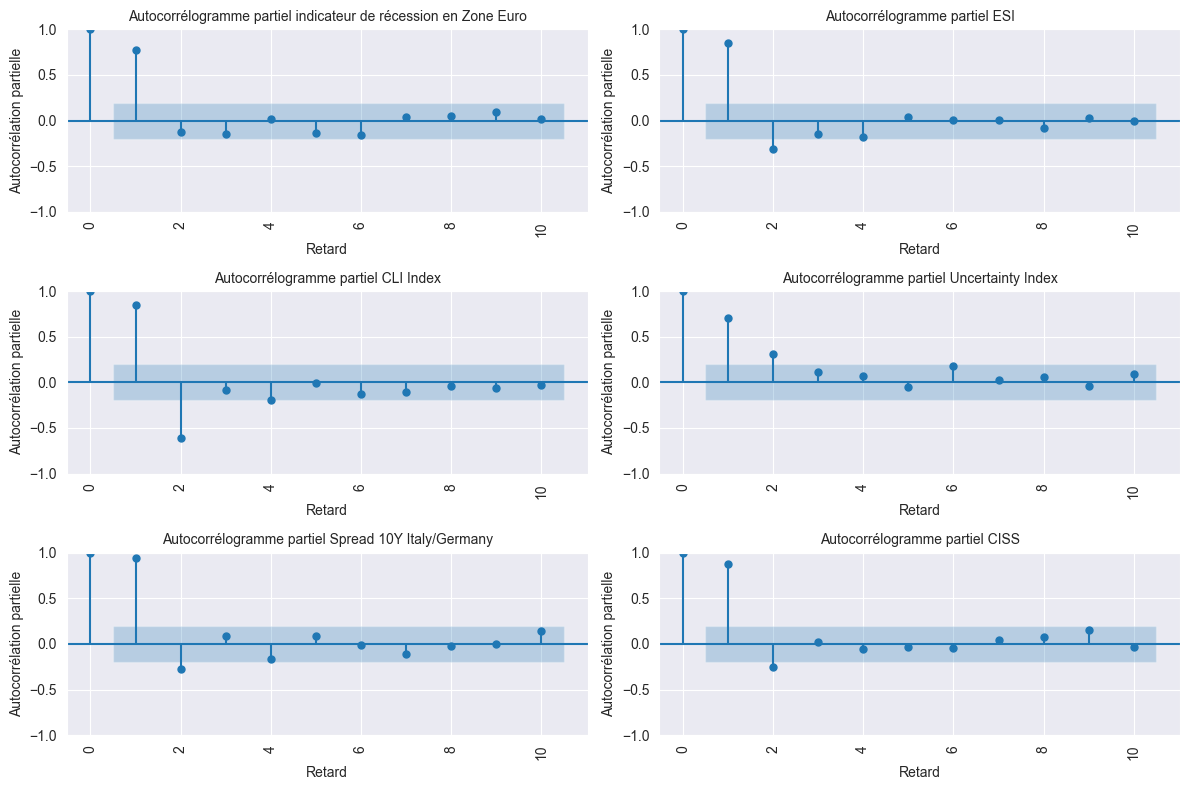

In [72]:
# Creation d'une grille 3x2
fig, axes = plt.subplots(3, 2, figsize=(12, 8))

# Liste des titres des graphiques
titles = ["Autocorr√©logramme partiel indicateur de r√©cession en Zone Euro", "Autocorr√©logramme partiel ESI", 
          "Autocorr√©logramme partiel CLI Index", "Autocorr√©logramme partiel Uncertainty Index", 
          "Autocorr√©logramme partiel Spread 10Y Italy/Germany", "Autocorr√©logramme partiel CISS"]

# Boucle pour afficher les graphiques
for i, (ax, data, title) in enumerate(zip(axes.flatten(), dataListEU, titles)):
    # Construction de l'autocorr√©logramme partiel
    plot_pacf(data, lags=10, method="ywm", ax=ax)
    # Ajout de titres
    ax.set_xlabel("Retard")
    ax.set_ylabel("Autocorr√©lation partielle")
    ax.set_title(title, fontsize=10)
    ax.tick_params(axis='x', rotation=90)
# Affichage des graphiques
plt.tight_layout()
plt.show()

Les autocorr√©lations partielles $\hat{r}$ (PACF) sont **significatives pour les trois premiers ordres**. La premi√®re
autocorr√©lation $\hat{r}_1$ partielle est tr√®s proche de 1. **Au-del√† du 3√®me rang, elles sont tr√®s proches 0**.

# II - Stationnarit√© des variables explicatives
### II.1 - Test de racine unitaire : Strat√©gie de tests s√©quentielle avec ADF

**La variable √† expliquer est, par construction, stationnaire**. Il s'agit d'une variable indicatrice qui prend deux valeurs : 1 en cas de r√©cession, 0 sinon. Pour le reste des variables, nous r√©alisons le **test de Dickey-Fuller augment√©** sur chacune des variables. Le **nombre de retards optimal** sera s√©lectionn√© selon le **crit√®re d‚ÄôAkaike** et tous les autres param√®tres sont laiss√©s par d√©faut. Pour chaque variable, nous effectuons le test ADF selon 3 sp√©cifications :
* Processus avec tendance d√©terministe et constante
* Processus avec constante (sans tendance d√©terministe)
* Processus sans tendance d√©terministe et sans constante

In [78]:
# Fonction pour afficher les r√©sultats du test ADF
def display_adf_results(data, label, regression_type):
    result = adfuller(data, maxlag=None, regression=regression_type, autolag='AIC', store=False, regresults=False)
    print(f"Results for {label} :")
    print("-" * 40)
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("\n")

Pour chaque s√©rie, nous disposons de **99 observations**, les seuils critiques sont √† chercher dans la **table de Dickey-Fuller** pour le mod√®le sp√©cifi√© :
* Processus avec tendance d√©terministe et constante
| ùõº      | 1%   | 5%   | 10%  |
|--------|------|------|------|
| N = 100| -4.04 | -3.45 | -3.15 |
* Processus avec constante (sans tendance d√©terministe)
| ùõº      | 1%   | 5%   | 10%  |
|--------|------|------|------|
| N = 100| -3.51 | -2.89 | -2.58 |
* Processus sans tendance d√©terministe et sans constante
| ùõº      | 1%   | 5%   | 10%  |
|--------|------|------|------|
| N = 100| -2.60 | -1.95 | -1.61 |

In [80]:
display_adf_results(esiDataEU, "ESI - Processus avec tendance d√©terministe et constante", 'ct')

Results for ESI - Processus avec tendance d√©terministe et constante :
----------------------------------------
ADF Statistic: -4.6448
p-value: 0.0009




La statistique de test $t_{ADF}$ est inf√©rieure aux seuils critiques pour ùõº = 1%, 5% et 10% pour le premier processus donc nous rejetons l‚Äôhypoth√®se nulle de racine unitaire $ùêª_0: ùúå = 0$. **La s√©rie ESI est stationnaire** autour d'une tendance d√©terministe avec une constante. Il n'est pas n√©cessaire d'√©tudier les deux autres processus.

In [83]:
display_adf_results(cliDataEU, "CLI - Processus avec tendance d√©terministe et constante ", 'ct')

Results for CLI - Processus avec tendance d√©terministe et constante  :
----------------------------------------
ADF Statistic: -5.5946
p-value: 0.0000




La statistique de test $t_{ADF}$ est inf√©rieure aux seuils critiques pour ùõº = 1%, 5% et 10% pour le premier processus donc nous rejetons l‚Äôhypoth√®se nulle de racine unitaire $ùêª_0: ùúå = 0$. **La s√©rie CLI est stationnaire** autour d'une tendance d√©terministe avec une constante. Il n'est pas n√©cessaire d'√©tudier les deux autres processus.

In [88]:
display_adf_results(uncertaintyDataEU, "Uncertainty - Processus avec tendance d√©terministe et constante ", 'ct')

Results for Uncertainty - Processus avec tendance d√©terministe et constante  :
----------------------------------------
ADF Statistic: -6.8684
p-value: 0.0000




La statistique de test $t_{ADF}$ est inf√©rieure aux seuils critiques pour ùõº = 1%, 5% et 10% pour le premier processus donc nous rejetons l‚Äôhypoth√®se nulle de racine unitaire $ùêª_0: ùúå = 0$. **La s√©rie Uncertainty est stationnaire** autour d'une tendance d√©terministe avec une constante. Il n'est pas n√©cessaire d'√©tudier les deux autres processus.

In [91]:
display_adf_results(spreadDataEU, "Spread Italy/Germany - Processus avec tendance d√©terministe et constante ", 'ct')
display_adf_results(spreadDataEU, "Spread Italy/Germany - Processus avec constante (sans tendance d√©terministe)", 'c')
display_adf_results(spreadDataEU, "Spread Italy/Germany - Processus sans tendance d√©terministe et sans constante ", 'n')

Results for Spread Italy/Germany - Processus avec tendance d√©terministe et constante  :
----------------------------------------
ADF Statistic: -2.6099
p-value: 0.2754


Results for Spread Italy/Germany - Processus avec constante (sans tendance d√©terministe) :
----------------------------------------
ADF Statistic: -2.3008
p-value: 0.1717


Results for Spread Italy/Germany - Processus sans tendance d√©terministe et sans constante  :
----------------------------------------
ADF Statistic: -1.1590
p-value: 0.2247




La statistique de test $t_{ADF}$ est sup√©rieure aux seuils critiques pour ùõº = 1% donc nous ne rejetons pas
l‚Äôhypoth√®se nulle de racine unitaire $ùêª_0: ùúå = 0$. **La s√©rie Italy/Germany est non-stationnaire**.

In [94]:
display_adf_results(stressDataEU, "Systemic Stress Index - Processus avec tendance d√©terministe et constante ", 'ct')
display_adf_results(stressDataEU, "Systemic Stress Index - Processus avec constante (sans tendance d√©terministe)", 'c')

Results for Systemic Stress Index - Processus avec tendance d√©terministe et constante  :
----------------------------------------
ADF Statistic: -3.1506
p-value: 0.0947


Results for Systemic Stress Index - Processus avec constante (sans tendance d√©terministe) :
----------------------------------------
ADF Statistic: -3.1084
p-value: 0.0259




La statistique de test $t_{ADF}$ est sup√©rieure aux seuils critiques pour ùõº = 1% et 5% pour le premier processus, elle est inf√©rieure au seuil √† 5% pour le deuxi√®me processus donc nous rejetons l‚Äôhypoth√®se nulle de racine unitaire $ùêª_0: ùúå = 0$. **La s√©rie Systemic Stress Index est stationnaire** avec une constante. Il n'est pas n√©cessaire d'√©tudier le troisi√®me processus.

### II.2 - Stationnarisation des s√©ries

Pour les s√©ries non stationnaires, nous calculons leur **diff√©rence premi√®re** autant de fois que n√©cessaire pour les rendre **I(0)**. Cette op√©ration r√©duit la taille de notre √©chantillon, donc nous tronquons √©galement les s√©ries d√©j√† stationnaires afin qu‚Äôelles aient toutes les m√™mes dimensions.

In [99]:
esiDataEUStationary = esiDataEU[1:]
cliDataEUStationary = cliDataEU[1:]
uncertaintyDataEUStationary = uncertaintyDataEU[1:]
spreadDataEUStationary = spreadDataEU.diff().dropna()
stressDataEUStationary = stressDataEU[1:]

# III - Mod√®le Probit : Indicateur de probabilit√© de r√©cession
### III.1 - Construction du mod√®le

In [102]:
# Construction d'un nouveau DataFrame avec nos donn√©es stationnaires
X = pd.DataFrame({
    'ESI': esiDataEUStationary,
    'CLI': cliDataEUStationary,
    'Uncertainty' : uncertaintyDataEUStationary,
    'Spread' : spreadDataEUStationary,
    'Stress' : stressDataEUStationary})

# Ajout d'une constante √† X puisque la fonction Probit n'en a pas par d√©faut
X = sm.add_constant(X)

# Variable d√©pendante
y = recessionDataEU[1:]

# Ajustement du mod√®le Probit
model = sm.Probit(y, X)
result = model.fit()
predictions = result.predict(X)
# Affichage des r√©sultats du mod√®le
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.217870
         Iterations 8
                            Probit Regression Results                             
Dep. Variable:     Recession Indicator EU   No. Observations:                   98
Model:                             Probit   Df Residuals:                       92
Method:                               MLE   Df Model:                            5
Date:                    Thu, 02 Jan 2025   Pseudo R-squ.:                  0.5105
Time:                            18:55:27   Log-Likelihood:                -21.351
converged:                           True   LL-Null:                       -43.614
Covariance Type:                nonrobust   LLR p-value:                 1.811e-08
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          44.8511     25.288      1.774      0.076      -4.713      9

### III.2 - Affichage des r√©sultats

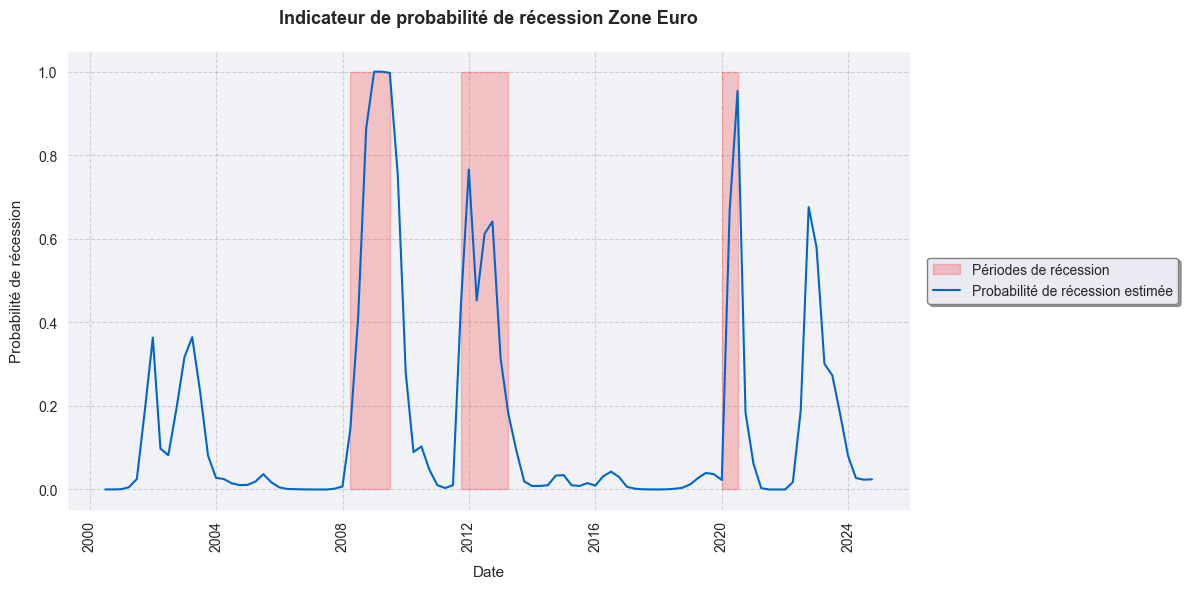

In [105]:
# Configuration du style
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

# Cr√©ation de la figure avec des marges ajust√©es
fig, ax = plt.subplots(figsize=(12, 6))

# Affichage des p√©riodes de r√©cession
ax.fill_between(recessionDataEU[1:].index, 0, 1, where=(recessionDataEU[1:] == 1), 
                color='red', alpha=0.2, label='P√©riodes de r√©cession')

# Ajout des probabilit√©s de r√©cession estim√©es
ax.plot(recessionDataEU[1:].index, predictions, 
        label='Probabilit√© de r√©cession estim√©e', color='#0066CC', linewidth=1.5)

# Ajout de titres
ax.set_title('Indicateur de probabilit√© de r√©cession Zone Euro', pad=20, fontsize=13, fontweight='bold')
ax.set_xlabel('Date', fontsize=11, labelpad=10)
ax.set_ylabel('Probabilit√© de r√©cession', fontsize=11, labelpad=10)
ax.tick_params(axis='x', rotation=90)

# Ajout d'un fond
ax.set_facecolor('#F0F2F6')
ax.grid(True, linestyle='--', alpha=0.3, color='gray')

# Ajout d'une l√©gende
ax.legend(bbox_to_anchor=(1.02, 0.5), loc="center left", borderaxespad=0, fontsize=10,
         frameon=True, fancybox=True, edgecolor='gray', shadow=True)

# Affichage du graphique
plt.tight_layout()
plt.show()

### III.3 - Pr√©dictions du mod√®le pour 2025

In [108]:
warnings.filterwarnings('ignore', 'No frequency information was provided')

# Fonction r√©alisant des pr√©visions ARIMA pour chaque variable explicative
def forecast_variables(X, periods=4):
    forecasts = {}
    
    # Pour chaque variable (sauf la constante)
    for column in X.columns[1:]:
        # Ajustement du mod√®le ARIMA
        model = ARIMA(X[column], order=(1,0,1))
        results = model.fit()
        # R√©alisation des pr√©visions
        forecast = results.forecast(steps=periods)
        forecasts[column] = forecast
    
    # Cr√©ation d'un DataFrame avec les pr√©visions
    forecast_df = pd.DataFrame(forecasts)
    # Ajout de la constante
    forecast_df.insert(0, 'const', 1.0)
    
    return forecast_df

# Fonction utilisant les pr√©visions des variables explicatives pour pr√©dire la probabilit√© de r√©cession
def make_recession_predictions(probit_model, forecast_df):
    return probit_model.predict(forecast_df)

# R√©alisation des pr√©visions pour les variables explicatives
forecast_X = forecast_variables(X, periods=4)

# Utilisation des pr√©visions dans le mod√®le Probit
recession_probabilities = make_recession_predictions(result, forecast_X)

# Cr√©ation d'un DataFrame pour afficher les r√©sultats
forecast_dates = pd.date_range(start=X.index[-1], periods=5, freq='Q')[1:]  # Ajustez selon vos dates
forecast_results = pd.DataFrame({'Recession_Probability': recession_probabilities})

# Affichage des r√©sultats
print("\nPr√©visions de probabilit√© de r√©cession pour les 4 prochains trimestres :")
print(forecast_results)


Pr√©visions de probabilit√© de r√©cession pour les 4 prochains trimestres :
            Recession_Probability
2024-12-31               0.025498
2025-03-31               0.029975
2025-06-30               0.033493
2025-09-30               0.036588


C:\Users\nnayr\AppData\Local\Temp\ipykernel_12408\1613199747.py:34: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_dates = pd.date_range(start=X.index[-1], periods=5, freq='Q')[1:]  # Ajustez selon vos dates


C:\Users\nnayr\AppData\Local\Temp\ipykernel_12408\899185501.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_value = predictions[-1]
C:\Users\nnayr\AppData\Local\Temp\ipykernel_12408\899185501.py:6: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_dates_new = pd.date_range(start=last_date, periods=5, freq='Q')


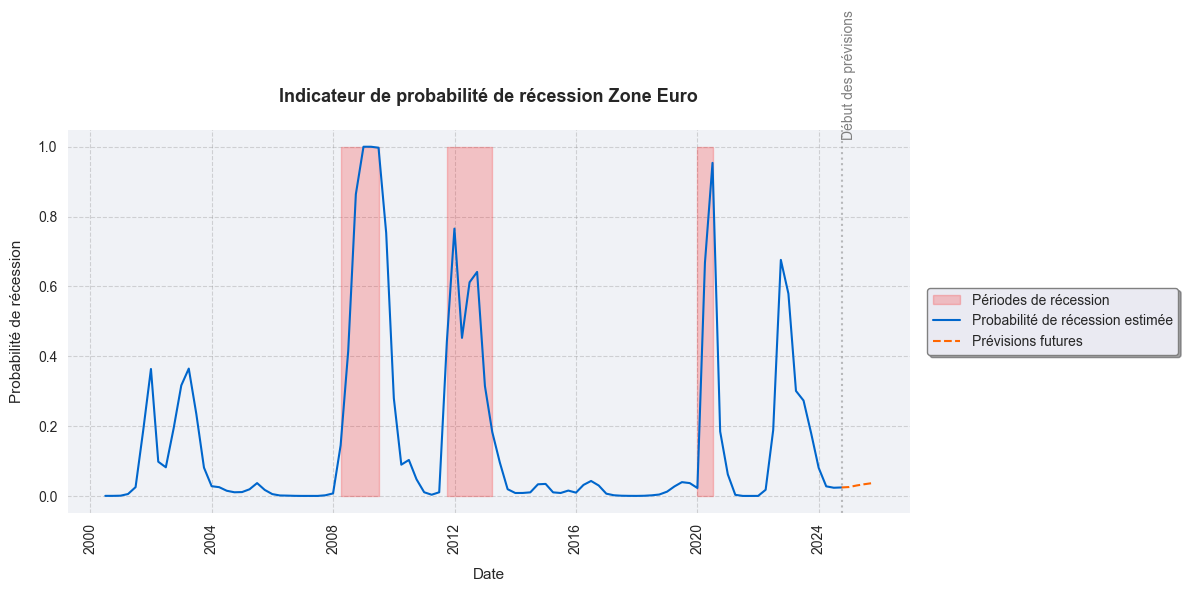

In [109]:
# R√©cup√©ration de la derni√®re date et de la derni√®re valeur des pr√©dictions historiques
last_date = recessionDataEU[1:].index[-1]
last_value = predictions[-1]

# Cr√©ation du DataFrame pour les pr√©visions en commen√ßant par le dernier point historique
forecast_dates_new = pd.date_range(start=last_date, periods=5, freq='Q')
forecast_results_new = np.concatenate(([last_value], recession_probabilities))

# Configuration du style
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

# Cr√©ation de la figure avec des marges ajust√©es
fig, ax = plt.subplots(figsize=(12, 6))

# Affichage des p√©riodes de r√©cession
ax.fill_between(recessionDataEU[1:].index, 0, 1, where=(recessionDataEU[1:] == 1), 
                color='red', alpha=0.2, label='P√©riodes de r√©cession')

# Ajout des probabilit√©s de r√©cession estim√©es
ax.plot(recessionDataEU[1:].index, predictions, 
        label='Probabilit√© de r√©cession estim√©e', color='#0066CC', linewidth=1.5)

# Ajout des pr√©visions futures avec un style diff√©rent
ax.plot(forecast_dates_new, forecast_results_new, 
        label='Pr√©visions futures', color='#FF6600', linewidth=1.5, linestyle='--')

# Ajout d'une ligne verticale pour marquer le d√©but des pr√©visions
ax.axvline(x=last_date, color='gray', linestyle=':', alpha=0.5)
ax.text(last_date, 1.02, 'D√©but des pr√©visions', 
        rotation=90, verticalalignment='bottom', color='gray')

# Ajout de titres
ax.set_title('Indicateur de probabilit√© de r√©cession Zone Euro', pad=20, fontsize=13, fontweight='bold')
ax.set_xlabel('Date', fontsize=11, labelpad=10)
ax.set_ylabel('Probabilit√© de r√©cession', fontsize=11, labelpad=10)
ax.tick_params(axis='x', rotation=90)

# Ajout d'un fond
ax.set_facecolor('#F0F2F6')
ax.grid(True, linestyle='--', alpha=0.3, color='gray')

# Ajout d'une l√©gende
ax.legend(bbox_to_anchor=(1.02, 0.5), loc="center left", borderaxespad=0, fontsize=10,
          frameon=True, fancybox=True, edgecolor='gray', shadow=True)

# Affichage du graphique
plt.tight_layout()
plt.show()